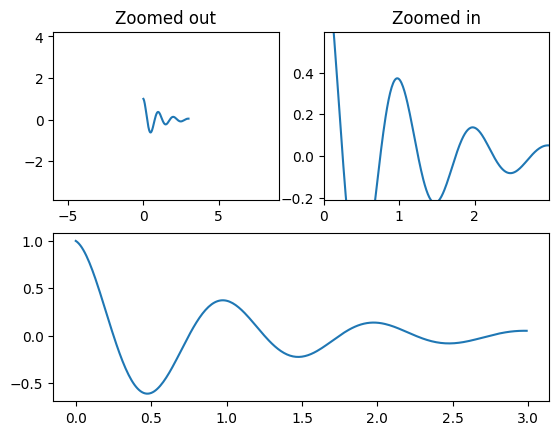

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


t1 = np.arange(0.0, 3.0, 0.01)

ax1 = plt.subplot(212)
ax1.margins(0.05)           # Default margin is 0.05, value 0 means fit
ax1.plot(t1, f(t1))

ax2 = plt.subplot(221)
ax2.margins(2, 2)           # Values >0.0 zoom out
ax2.plot(t1, f(t1))
ax2.set_title('Zoomed out')

ax3 = plt.subplot(222)
ax3.margins(x=0, y=-0.25)   # Values in (-0.5, 0.0) zooms in to center
ax3.plot(t1, f(t1))
ax3.set_title('Zoomed in')

plt.show()

In [17]:
import librosa
import pandas as pd
import altair as alt
import altair_viewer

def getData():
  x, sr =librosa.load(r"C:\\Users\\Anwar\\Desktop\\SBME 2024\\YEAR 3 (2022-2023)\\DSP\\Tasks\\Task 2\\DSP_Task2\\Media\\S1 (mp3cut.net).wav")
  return x, sr

x, sr = getData()
t=np.array(range(0,len(x)))/(sr)
df = pd.DataFrame({'time' : t, 'signal' : list(x)}, columns = ['time', 'signal']) 

@
base = alt.Chart(df).mark_rule().encode(
    x='time',
    y='signal',
    
    # row=alt.Row("a:N", title="Factor A", header=alt.base)
).interactive()
alt.renderers.enable('default')
alt.data_transformers.disable_max_rows()
altair_viewer.display(base)
# base



C:\Users\Anwar\AppData\Roaming\Python\Python310\site-packages\altair\utils\core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


Displaying chart at http://localhost:51545/

C:\Users\Anwar\AppData\Local\Temp\ipykernel_15224\4053498982.py:9: FutureWarning: Pass y=[-5.1233856e-06  6.6644261e-06 -6.4732317e-06 ... -8.0810751e-05
 -9.6404430e-05 -1.3428181e-04], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_envelope = librosa.onset.onset_strength(y, sr)
C:\Users\Anwar\AppData\Local\Temp\ipykernel_15224\4053498982.py:18: FutureWarning: Pass y=[-5.1233856e-06  6.6644261e-06 -6.4732317e-06 ... -8.0810751e-05
 -9.6404430e-05 -1.3428181e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  o_env = librosa.onset.onset_strength(y, sr=sr)


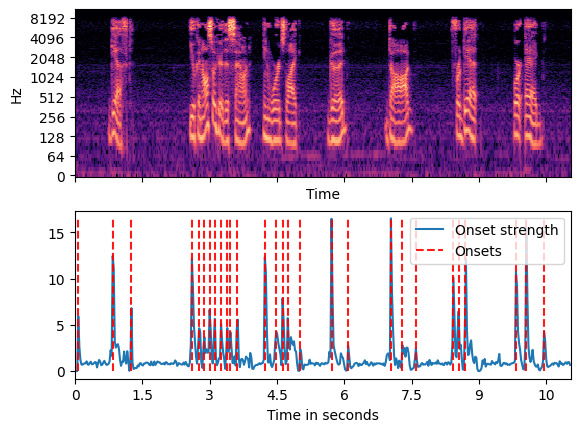

[array([ 0.06965986,  0.83591837,  1.25387755,  2.60063492,  2.7631746 ,
        2.87927438,  2.99537415,  3.11147392,  3.25079365,  3.39011338,
        3.45977324,  3.59909297,  4.22603175,  4.48145125,  4.62077098,
        4.73687075,  5.0155102 ,  5.71210884,  6.08362812,  7.03564626,
        7.29106576,  7.59292517,  8.42884354,  8.54494331,  8.68426304,
        9.82204082, 10.05424036, 10.44897959])]
[  3  36  54 112 119 124 129 134 140 146 149 155 182 193 199 204 216 246
 262 303 314 327 363 368 374 423 433 450]
[ 0.          0.          0.          5.9367414   2.6472802   1.2239957
  0.70949334  0.6935859   0.784284    0.83767366  0.8373253   1.0499386
  0.7216339   0.6884767   0.9072042   1.0082986   0.7350754   0.7651724
  0.8525966   0.97830254  0.93209827  0.39446878  0.8847579   1.2037133
  1.017344    0.6330214   0.69075626  0.92041785  1.1065748   0.8488111
  0.68043965  0.69099987  0.77757204  1.033236    2.2466862   1.6551156
 12.450638   11.067095    3.2462585   2.5352

In [24]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

y, sr = librosa.load("g_sentence.wav")
 
onset_envelope = librosa.onset.onset_strength(y, sr)
onsets = librosa.onset.onset_detect(onset_envelope=onset_envelope)
 
librosa.onset.onset_detect(y=y, sr=sr, units='time')
 
D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log', ax=ax[0])
 
o_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)
 
 
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
 
ax[1].legend()
plt.xlabel("Time in seconds")
plt.show()
new_note_times = [times[onset_frames]]          # a list of the exact time a new note is being played
print(new_note_times)
print(onset_frames)
print(onset_envelope)
print(onsets)
print(o_env)
print(D)
# print(D[4*sr])
ipd.Audio(y,rate=sr)